In [1]:
# taken from https://gluon-cv.mxnet.io/build/examples_segmentation/demo_deeplab.html
# dataset description https://groups.csail.mit.edu/vision/datasets/ADE20K/, https://github.com/dmlc/gluon-cv/blob/master/gluoncv/data/ade20k/segmentation.py
# deeplab code https://github.com/dmlc/gluon-cv/blob/master/gluoncv/model_zoo/deeplabv3.py

In [2]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

In [3]:
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001755.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename, True)

14KB [00:00, 2006.09KB/s]             


'ade20k_example.jpg'

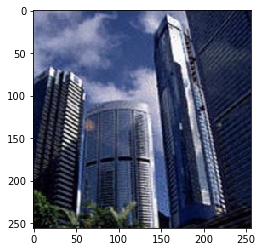

In [4]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [5]:
from gluoncv.data.transforms.presets.segmentation import test_transform
print(img.shape)
img = test_transform(img, ctx)
print(img.shape)

(256, 256, 3)
(1, 3, 256, 256)


In [6]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)


In [7]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [8]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

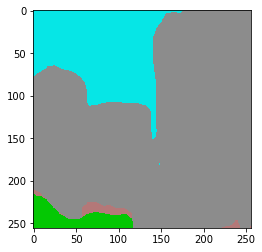

In [9]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

In [14]:
import numpy as np

def find_class_name(x):
    # ADE dataset classes # numbered from 1!
    CLASSES = ("wall", "building, edifice", "sky", "floor, flooring", "tree",
               "ceiling", "road, route", "bed", "windowpane, window", "grass",
               "cabinet", "sidewalk, pavement",
               "person, individual, someone, somebody, mortal, soul",
               "earth, ground", "door, double door", "table", "mountain, mount",
               "plant, flora, plant life", "curtain, drape, drapery, mantle, pall",
               "chair", "car, auto, automobile, machine, motorcar",
               "water", "painting, picture", "sofa, couch, lounge", "shelf",
               "house", "sea", "mirror", "rug, carpet, carpeting", "field", "armchair",
               "seat", "fence, fencing", "desk", "rock, stone", "wardrobe, closet, press",
               "lamp", "bathtub, bathing tub, bath, tub", "railing, rail", "cushion",
               "base, pedestal, stand", "box", "column, pillar", "signboard, sign",
               "chest of drawers, chest, bureau, dresser", "counter", "sand", "sink",
               "skyscraper", "fireplace, hearth, open fireplace", "refrigerator, icebox",
               "grandstand, covered stand", "path", "stairs, steps", "runway",
               "case, display case, showcase, vitrine",
               "pool table, billiard table, snooker table", "pillow",
               "screen door, screen", "stairway, staircase", "river", "bridge, span",
               "bookcase", "blind, screen", "coffee table, cocktail table",
               "toilet, can, commode, crapper, pot, potty, stool, throne",
               "flower", "book", "hill", "bench", "countertop",
               "stove, kitchen stove, range, kitchen range, cooking stove",
               "palm, palm tree", "kitchen island",
               "computer, computing machine, computing device, data processor, "
               "electronic computer, information processing system",
               "swivel chair", "boat", "bar", "arcade machine",
               "hovel, hut, hutch, shack, shanty",
               "bus, autobus, coach, charabanc, double-decker, jitney, motorbus, "
               "motorcoach, omnibus, passenger vehicle",
               "towel", "light, light source", "truck, motortruck", "tower",
               "chandelier, pendant, pendent", "awning, sunshade, sunblind",
               "streetlight, street lamp", "booth, cubicle, stall, kiosk",
               "television receiver, television, television set, tv, tv set, idiot "
               "box, boob tube, telly, goggle box",
               "airplane, aeroplane, plane", "dirt track",
               "apparel, wearing apparel, dress, clothes",
               "pole", "land, ground, soil",
               "bannister, banister, balustrade, balusters, handrail",
               "escalator, moving staircase, moving stairway",
               "ottoman, pouf, pouffe, puff, hassock",
               "bottle", "buffet, counter, sideboard",
               "poster, posting, placard, notice, bill, card",
               "stage", "van", "ship", "fountain",
               "conveyer belt, conveyor belt, conveyer, conveyor, transporter",
               "canopy", "washer, automatic washer, washing machine",
               "plaything, toy", "swimming pool, swimming bath, natatorium",
               "stool", "barrel, cask", "basket, handbasket", "waterfall, falls",
               "tent, collapsible shelter", "bag", "minibike, motorbike", "cradle",
               "oven", "ball", "food, solid food", "step, stair", "tank, storage tank",
               "trade name, brand name, brand, marque", "microwave, microwave oven",
               "pot, flowerpot", "animal, animate being, beast, brute, creature, fauna",
               "bicycle, bike, wheel, cycle", "lake",
               "dishwasher, dish washer, dishwashing machine",
               "screen, silver screen, projection screen",
               "blanket, cover", "sculpture", "hood, exhaust hood", "sconce", "vase",
               "traffic light, traffic signal, stoplight", "tray",
               "ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, "
               "dustbin, trash barrel, trash bin",
               "fan", "pier, wharf, wharfage, dock", "crt screen",
               "plate", "monitor, monitoring device", "bulletin board, notice board",
               "shower", "radiator", "glass, drinking glass", "clock", "flag")
    return CLASSES[x]


def create_mask_segments(prediction):
    # Get unique possible values
    unique_val = np.unique(prediction)
    list_masks_dec = []
    list_masks_rgb = []
    list_class = []
    for x in np.nditer(unique_val):
        list_class.append(find_class_name(int(x)))
        #new_mask = np.zeros((prediction.shape[0], prediction.shape[1], 3))
        # Where we find the value, we set it to 1 to become white.
        #idx_mask = np.where(prediction == x)
        masked_im_dec = (np.where(prediction == x, 0.99, 0))
        masked_im_rgb = (np.where(prediction == x, 255, 0))
        #print(masked_im)
        new_mask_dec = np.repeat(masked_im_dec[:, :, np.newaxis], 3, axis=2) # np.expand_dims(masked_im, axis=2)
        new_mask_rgb = np.repeat(masked_im_rgb[:, :, np.newaxis], 3, axis=2)
        #print(new_mask)
        list_masks_dec.append(new_mask_dec)
        list_masks_rgb.append(new_mask_rgb)
    return list_masks_dec, list_masks_rgb, list_class

In [11]:
new_im_dec, new_im_rgb = (create_mask_segments(predict))

1.0
2.0
4.0
48.0


In [12]:
from PIL import Image
new_im1 = Image.fromarray(new_im_rgb[3].astype('uint8'))
new_im1.save('test_mask_output.png')

In [29]:
new_im1_cv = cv.cvtColor(np.array(new_im1), cv.COLOR_RGB2BGR)
imgray = cv.cvtColor(new_im1_cv, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [13]:
import cv2 as cv
im = cv.imread('test_mask_output.png')

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


In [18]:
print(contours[0].shape)
print(len(contours))

(205, 1, 2)
2


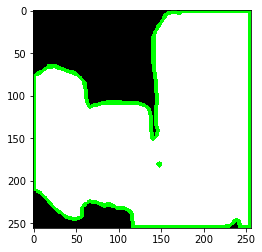

In [30]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt
plt.imshow(thresh)

cv.drawContours(new_im1_cv, contours, -1, (0,255,0), 3)

plt.imshow( new_im1_cv)
plt.show()

In [21]:
from shapely.geometry import Polygon

def contour_to_polygon(output_contours):
    list_polygon = []
    for contour in output_contours:
        contour = np.squeeze(contour)
        if len(contour) > 2:
            list_polygon.append(Polygon(contour))
    return list_polygon

In [19]:
def deeplab_pred_to_output(prediction, _plot=False):
    new_im_dec, new_im_rgb, list_class = (create_mask_segments(prediction))
    
    list_polygons = []
    for mask, class_name in zip(new_im_rgb, list_class):
        new_im1 = Image.fromarray(mask.astype('uint8'))
        new_im1_cv = cv.cvtColor(np.array(new_im1), cv.COLOR_RGB2BGR)
        imgray = cv.cvtColor(new_im1_cv, cv.COLOR_BGR2GRAY)
        ret, thresh = cv.threshold(imgray, 127, 255, 0)
        contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

        if _plot:
            plt.imshow(thresh)
            cv.drawContours(new_im1_cv, contours, -1, (0,255,0), 3)
            plt.imshow( new_im1_cv)
            plt.show()

        list_polygons.append((contour_to_polygon(contours), class_name))
    
    return list_polygons

In [15]:
import numpy as np
#test_im = np.zeros((256,256,3)) # Black. Ones make white
plt.imshow(new_im[3])
plt.show()

NameError: name 'new_im' is not defined

In [ ]:
# ADE dataset classes # numbered from 1!
CLASSES = ("wall", "building, edifice", "sky", "floor, flooring", "tree",
               "ceiling", "road, route", "bed", "windowpane, window", "grass",
               "cabinet", "sidewalk, pavement",
               "person, individual, someone, somebody, mortal, soul",
               "earth, ground", "door, double door", "table", "mountain, mount",
               "plant, flora, plant life", "curtain, drape, drapery, mantle, pall",
               "chair", "car, auto, automobile, machine, motorcar",
               "water", "painting, picture", "sofa, couch, lounge", "shelf",
               "house", "sea", "mirror", "rug, carpet, carpeting", "field", "armchair",
               "seat", "fence, fencing", "desk", "rock, stone", "wardrobe, closet, press",
               "lamp", "bathtub, bathing tub, bath, tub", "railing, rail", "cushion",
               "base, pedestal, stand", "box", "column, pillar", "signboard, sign",
               "chest of drawers, chest, bureau, dresser", "counter", "sand", "sink",
               "skyscraper", "fireplace, hearth, open fireplace", "refrigerator, icebox",
               "grandstand, covered stand", "path", "stairs, steps", "runway",
               "case, display case, showcase, vitrine",
               "pool table, billiard table, snooker table", "pillow",
               "screen door, screen", "stairway, staircase", "river", "bridge, span",
               "bookcase", "blind, screen", "coffee table, cocktail table",
               "toilet, can, commode, crapper, pot, potty, stool, throne",
               "flower", "book", "hill", "bench", "countertop",
               "stove, kitchen stove, range, kitchen range, cooking stove",
               "palm, palm tree", "kitchen island",
               "computer, computing machine, computing device, data processor, "
               "electronic computer, information processing system",
               "swivel chair", "boat", "bar", "arcade machine",
               "hovel, hut, hutch, shack, shanty",
               "bus, autobus, coach, charabanc, double-decker, jitney, motorbus, "
               "motorcoach, omnibus, passenger vehicle",
               "towel", "light, light source", "truck, motortruck", "tower",
               "chandelier, pendant, pendent", "awning, sunshade, sunblind",
               "streetlight, street lamp", "booth, cubicle, stall, kiosk",
               "television receiver, television, television set, tv, tv set, idiot "
               "box, boob tube, telly, goggle box",
               "airplane, aeroplane, plane", "dirt track",
               "apparel, wearing apparel, dress, clothes",
               "pole", "land, ground, soil",
               "bannister, banister, balustrade, balusters, handrail",
               "escalator, moving staircase, moving stairway",
               "ottoman, pouf, pouffe, puff, hassock",
               "bottle", "buffet, counter, sideboard",
               "poster, posting, placard, notice, bill, card",
               "stage", "van", "ship", "fountain",
               "conveyer belt, conveyor belt, conveyer, conveyor, transporter",
               "canopy", "washer, automatic washer, washing machine",
               "plaything, toy", "swimming pool, swimming bath, natatorium",
               "stool", "barrel, cask", "basket, handbasket", "waterfall, falls",
               "tent, collapsible shelter", "bag", "minibike, motorbike", "cradle",
               "oven", "ball", "food, solid food", "step, stair", "tank, storage tank",
               "trade name, brand name, brand, marque", "microwave, microwave oven",
               "pot, flowerpot", "animal, animate being, beast, brute, creature, fauna",
               "bicycle, bike, wheel, cycle", "lake",
               "dishwasher, dish washer, dishwashing machine",
               "screen, silver screen, projection screen",
               "blanket, cover", "sculpture", "hood, exhaust hood", "sconce", "vase",
               "traffic light, traffic signal, stoplight", "tray",
               "ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, "
               "dustbin, trash barrel, trash bin",
               "fan", "pier, wharf, wharfage, dock", "crt screen",
               "plate", "monitor, monitoring device", "bulletin board, notice board",
               "shower", "radiator", "glass, drinking glass", "clock", "flag")

In [22]:
from PIL import Image
import cv2 as cv

deeplab_pred_to_output(predict)



[[255 254]
 [255 255]]
[[237 247]
 [237 248]
 [232 253]
 [231 253]
 [230 254]
 [225 254]
 [224 255]
 [222 255]
 [242 255]
 [242 253]
 [241 252]
 [241 250]
 [240 249]
 [240 247]]
[ 37 242]
[[ 31 238]
 [ 33 240]
 [ 34 240]
 [ 35 241]
 [ 32 238]]
[[ 66 225]
 [ 65 226]
 [ 64 226]
 [ 61 229]
 [ 60 229]
 [ 58 231]
 [ 58 242]
 [ 59 241]
 [ 60 241]
 [ 62 239]
 [ 63 239]
 [ 64 238]
 [ 65 238]
 [ 66 237]
 [ 70 237]
 [ 71 236]
 [ 76 236]
 [ 77 237]
 [ 83 237]
 [ 84 238]
 [ 86 238]
 [ 87 239]
 [ 89 239]
 [ 90 240]
 [102 240]
 [103 239]
 [106 239]
 [107 238]
 [108 239]
 [109 239]
 [111 241]
 [112 241]
 [114 243]
 [115 243]
 [115 238]
 [114 237]
 [113 237]
 [112 236]
 [111 236]
 [109 234]
 [108 234]
 [107 233]
 [ 98 233]
 [ 97 232]
 [ 96 232]
 [ 95 231]
 [ 94 231]
 [ 93 230]
 [ 92 230]
 [ 91 229]
 [ 86 229]
 [ 85 230]
 [ 82 230]
 [ 81 229]
 [ 80 229]
 [ 79 228]
 [ 77 228]
 [ 76 227]
 [ 75 227]
 [ 74 226]
 [ 68 226]
 [ 67 225]]
[[  0 210]
 [  0 215]
 [  1 215]
 [  2 216]
 [  3 216]
 [  4 217]
 [  6 2

[([<shapely.geometry.polygon.Polygon at 0x22616658908>,
  'building, edifice'),
 ([<shapely.geometry.polygon.Polygon at 0x22616658888>], 'sky'),
 ([<shapely.geometry.polygon.Polygon at 0x22616658b08>], 'tree'),
 ([<shapely.geometry.polygon.Polygon at 0x22616658c08>,
  'skyscraper')]